# Data Extraction

Extract data from a MIMIC Waveform record.

## Identify a record

In [2]:
# setup
import sys
import wfdb

In [6]:
# get a list of records in the database
database_name = 'bidmc'
records = wfdb.get_record_list(database_name)
print("List of records loaded for {} database".format(database_name))

List of records loaded for bidmc database


In [7]:
# Select the first record
selected_record = records[0]
print("Selected record: {}".format(selected_record))

Selected record: bidmc01


## Extract data from this record

In [8]:
# load data from this record
no_seconds_to_load = 5
record_data = wfdb.rdrecord(record_name=selected_record, sampfrom=0, sampto=125*no_seconds_to_load, pn_dir=database_name) 
print("{} seconds of data loaded from: {}".format(no_seconds_to_load, selected_record))

5 seconds of data loaded from bidmc01


## Plot signals in this record
Plot the signals contained in this record

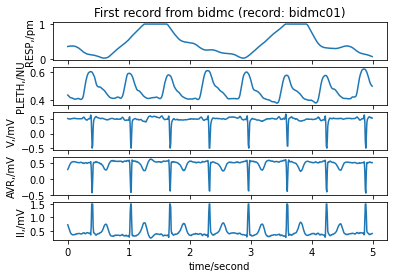

In [9]:
# plot the data loaded from this record
title_text = "First record from " + database_name + " (record: " + selected_record + ")"
wfdb.plot_wfdb(record=record_data, title=title_text, time_units='seconds') 

In [17]:
record_contains_signals_log = 'RESP,' in record_data.sig_name and 'PLETH,' in record_data.sig_name
if record_contains_signals_log:
    print('This record contains the required signals')
else:
    print('This record doesn\'t contain the required signals')

This record contains the required signals


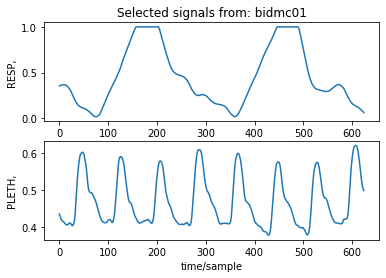

In [18]:
# plot just the signals of interest from this record
title_text = "Selected signals from: " + selected_record
wfdb.plot_items(signal=record_data.p_signal[:,0:2], title = title_text, ylabel = record_data.sig_name[0:2])